In [1]:
#IMPORTAR LIBRERIAS NECESARIAS
import pandas as pd
import matplotlib.pyplot as plt
import json


In [2]:
df = pd.read_json("C:\\Users\\tinaq\\model_training\\Data\\MLA_100k.jsonlines", lines=True)


In [6]:
# Ver información general del DataFrame
df.info()

# Estadísticas descriptivas de las columnas numéricas
df.describe()

# Mostrar las primeras filas del DataFrame
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 48 columns):
 #   Column                            Non-Null Count   Dtype              
---  ------                            --------------   -----              
 0   seller_address                    100000 non-null  object             
 1   warranty                          39104 non-null   object             
 2   sub_status                        100000 non-null  object             
 3   condition                         100000 non-null  object             
 4   seller_contact                    2219 non-null    object             
 5   deal_ids                          100000 non-null  object             
 6   base_price                        100000 non-null  float64            
 7   shipping                          100000 non-null  object             
 8   non_mercado_pago_payment_methods  100000 non-null  object             
 9   seller_id                         100000 non-null

,seller_address,warranty,sub_status,condition,seller_contact,deal_ids,base_price,shipping,non_mercado_pago_payment_methods,seller_id,...,status,video_id,catalog_product_id,subtitle,initial_quantity,start_time,permalink,geolocation,sold_quantity,available_quantity
0,"{'comment': '', 'longitude': -58.3986709, 'id'...",None,[],new,None,[],80.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",74952096,...,active,None,NaN,NaN,1,2015-09-05 20:42:53+00:00,http://articulo.mercadolibre.com.ar/MLA-578052...,"{'latitude': -34.6280698, 'longitude': -58.398...",0,1
1,"{'comment': '', 'longitude': -58.5059173, 'id'...",NUESTRA REPUTACION,[],used,None,[],2650.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",42093335,...,active,None,NaN,NaN,1,2015-09-26 18:08:30+00:00,http://articulo.mercadolibre.com.ar/MLA-581565...,"{'latitude': -34.5935524, 'longitude': -58.505...",0,1
2,"{'comment': '', 'longitude': -58.4143948, 'id'...",None,[],used,None,[],60.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",133384258,...,active,None,NaN,NaN,1,2015-09-09 23:57:07+00:00,http://articulo.mercadolibre.com.ar/MLA-578780...,"{'latitude': -34.6233907, 'longitude': -58.414...",0,1
3,"{'comment': '', 'longitude': -58.4929208, 'id'...",None,[],new,None,[],580.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",143001605,...,active,None,NaN,NaN,1,2015-09-28 18:47:56+00:00,http://articulo.mercadolibre.com.ar/MLA-581877...,"{'latitude': -34.6281894, 'longitude': -58.492...",0,1
4,"{'comment': '', 'longitude': -58.5495042, 'id'...",MI REPUTACION.,[],used,None,[],30.0,"{'local_pick_up': True, 'methods': [], 'tags':...","[{'description': 'Transferencia bancaria', 'id...",96873449,...,active,None,NaN,NaN,1,2015-08-24 22:07:20+00:00,http://articulo.mercadolibre.com.ar/MLA-576112...,"{'latitude': -34.6346547, 'longitude': -58.549...",0,1


In [7]:
# Verificar valores nulos en cada columna
df.isnull().sum()


seller_address                           0
warranty                             60896
sub_status                               0
condition                                0
seller_contact                       97781
deal_ids                                 0
base_price                               0
shipping                                 0
non_mercado_pago_payment_methods         0
seller_id                                0
variations                               0
location                                 0
site_id                                  0
listing_type_id                          0
price                                    0
attributes                               0
buying_mode                              0
tags                                     0
listing_source                           0
parent_item_id                       23011
coverage_areas                           0
category_id                              0
descriptions                             0
last_update

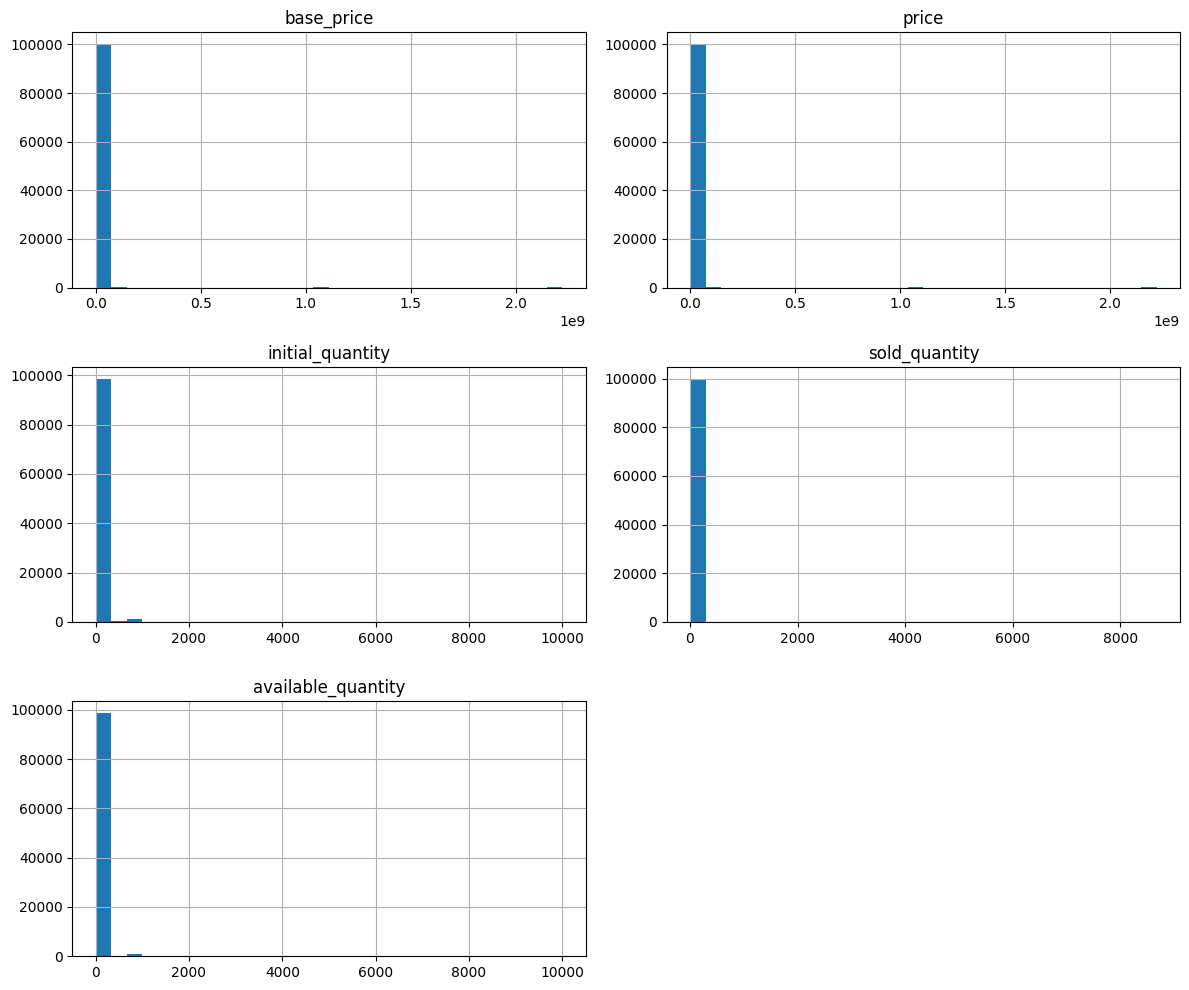

In [8]:
# Seleccionar las columnas numéricas para hacer el análisis
numeric_columns = ['base_price', 'price', 'initial_quantity', 'sold_quantity', 'available_quantity']

# Histograma para ver la distribución de las variables numéricas
df[numeric_columns].hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


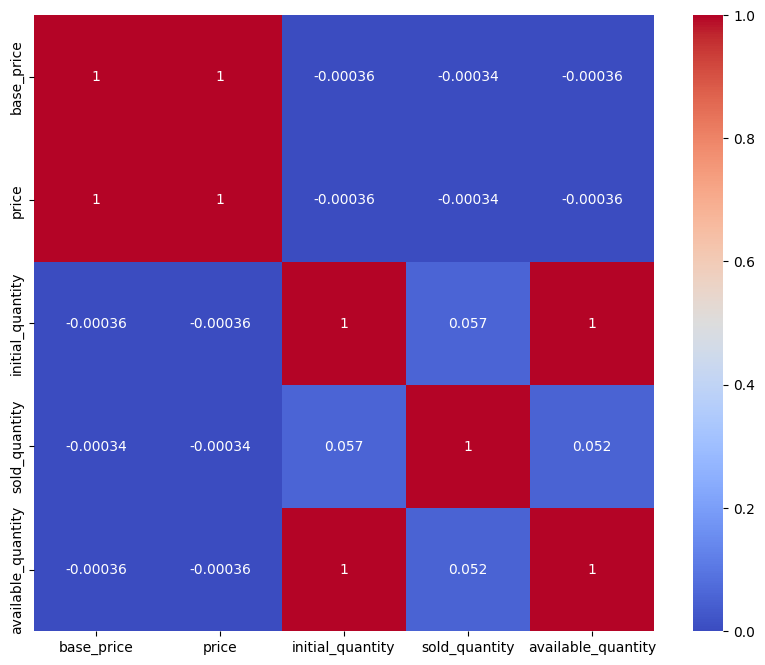

In [10]:
# Importar las bibliotecas necesarias
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular la matriz de correlación de las variables numéricas
numeric_columns = ['base_price', 'price', 'initial_quantity', 'sold_quantity', 'available_quantity']
correlation_matrix = df[numeric_columns].corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


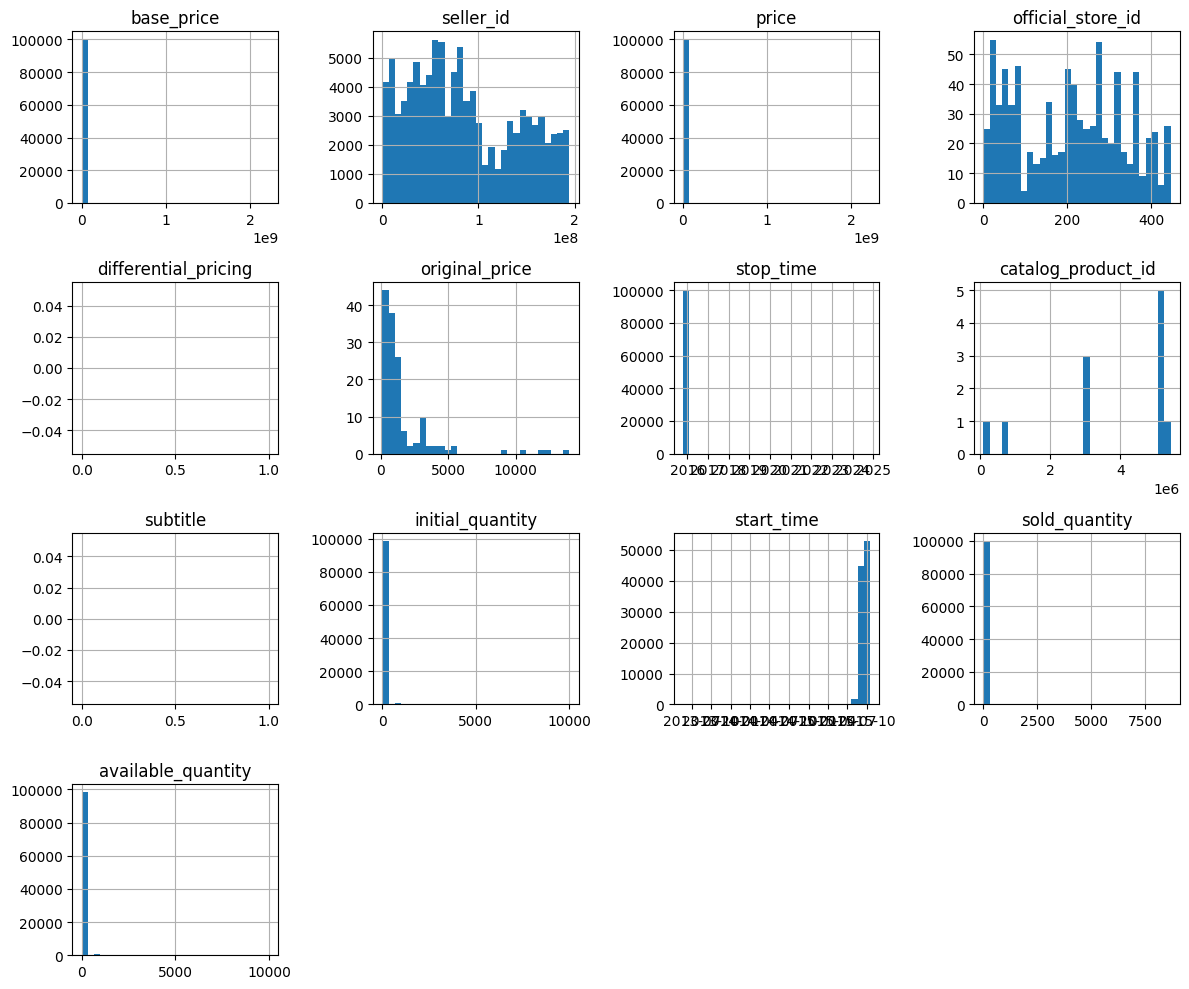

In [11]:
import matplotlib.pyplot as plt

# Histograma para las columnas numéricas
df.hist(figsize=(12, 10), bins=30)
plt.tight_layout()
plt.show()


In [ ]:
#SE CORRE DESPUES DE ACOMODAR LAS COLUMNAS
# Mostrar la cantidad de categorías únicas y frecuencia para cada columna categórica
for col in df.select_dtypes(include='object').columns:
    print(f"{col}:")
    print(df[col].value_counts())
    print("\n")


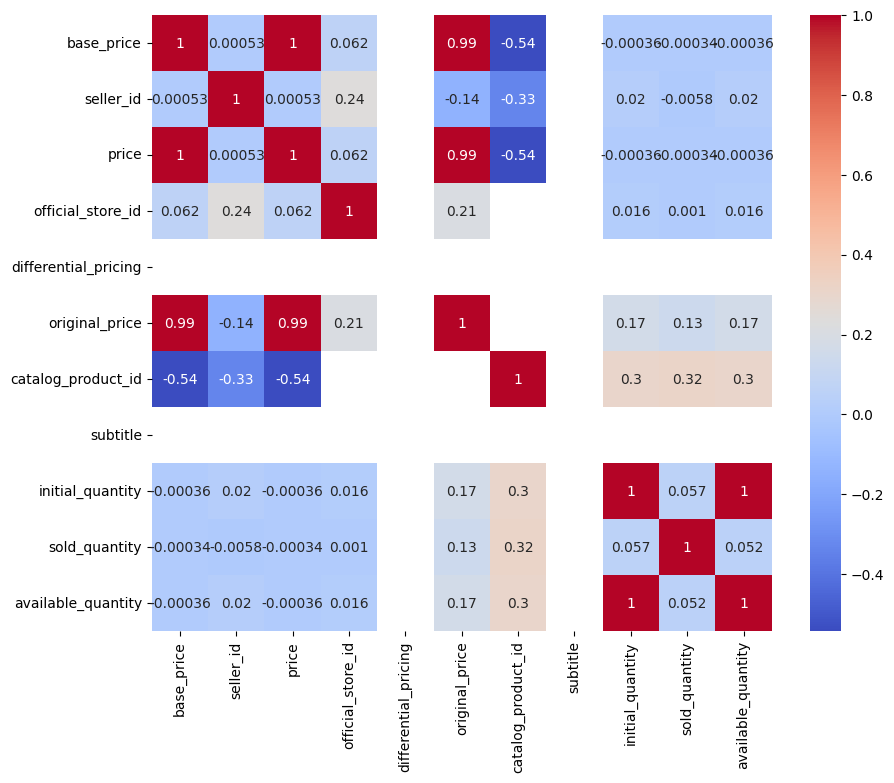

In [4]:
# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación solo para las columnas numéricas
correlation_matrix = numeric_df.corr()

# Visualización de la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


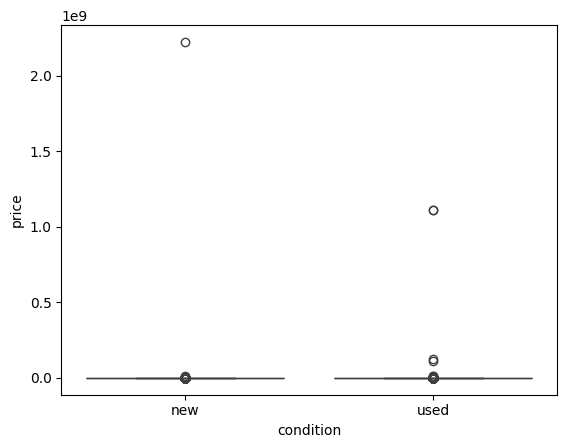

In [6]:
# Boxplot para ver la relación entre la condición y el precio
sns.boxplot(x='condition', y='price', data=df)
plt.show()




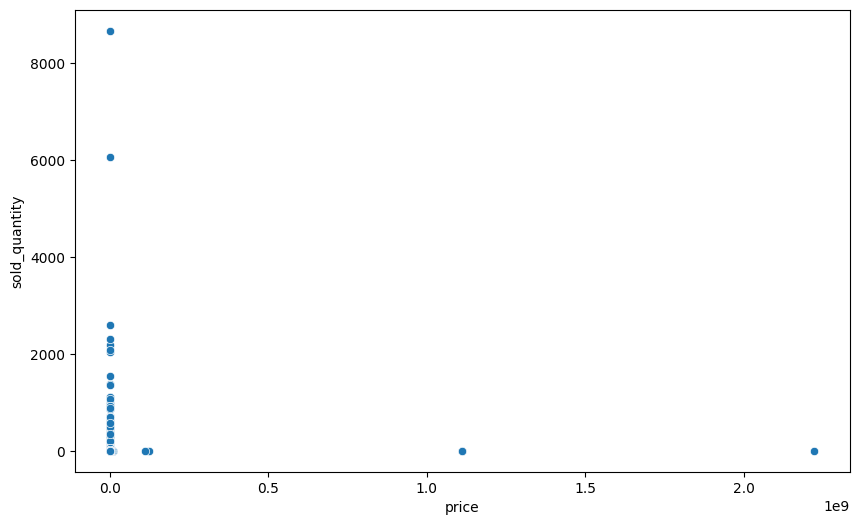

In [7]:
# Gráfico de dispersión entre precio y cantidad vendida
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price', y='sold_quantity', data=df)
plt.show()

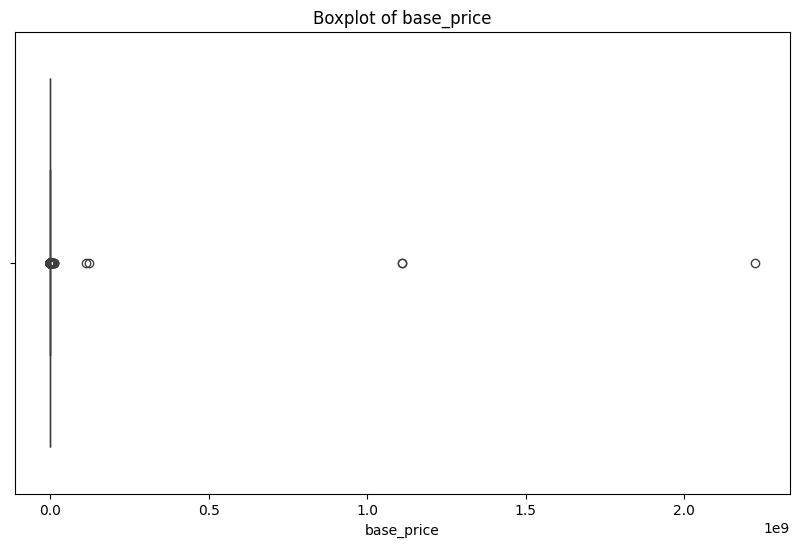

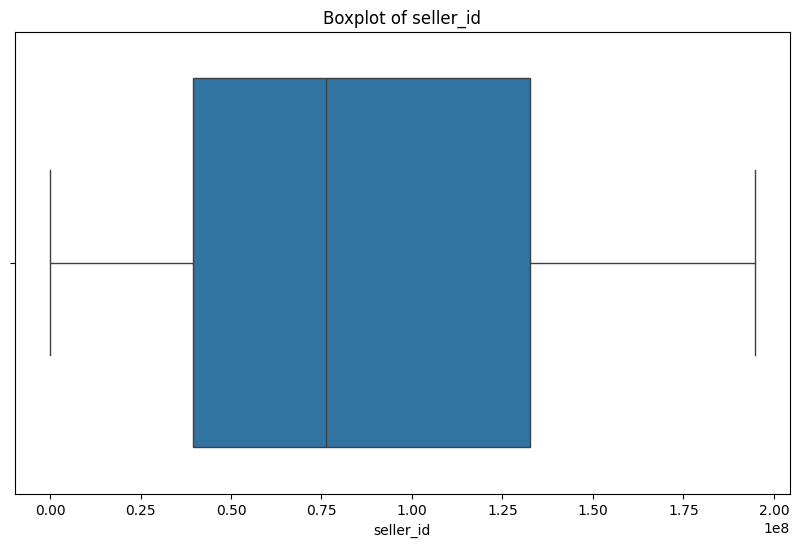

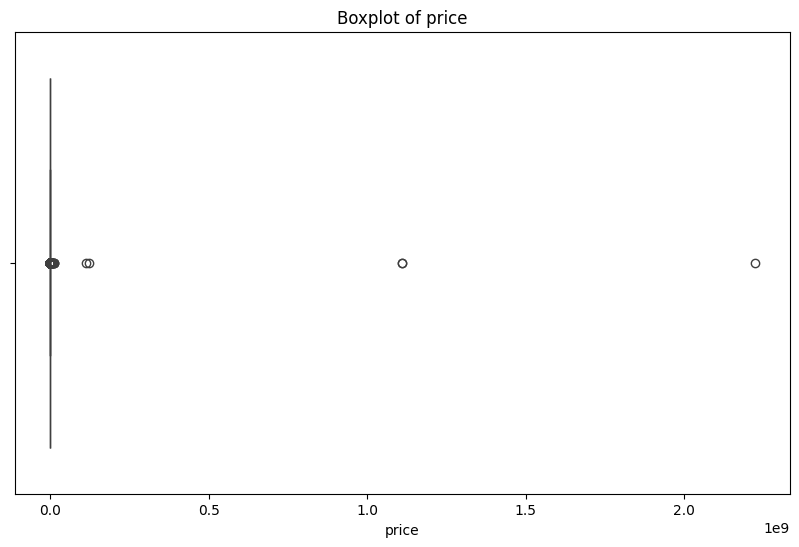

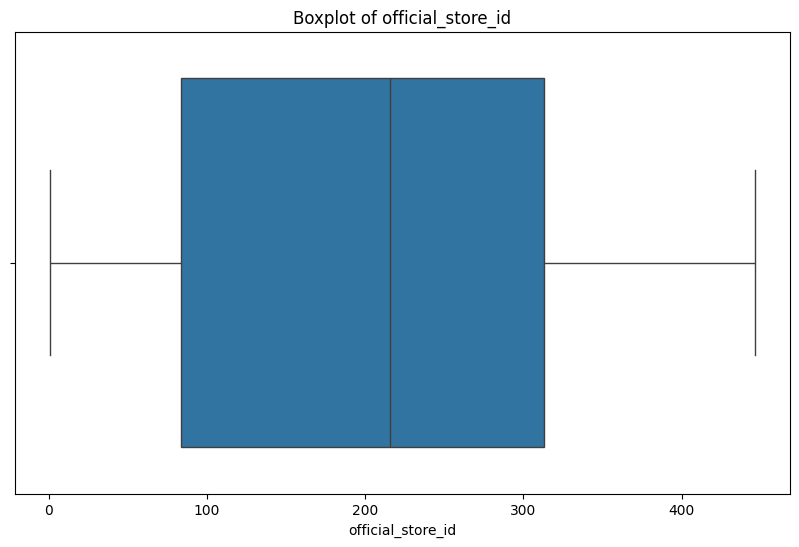

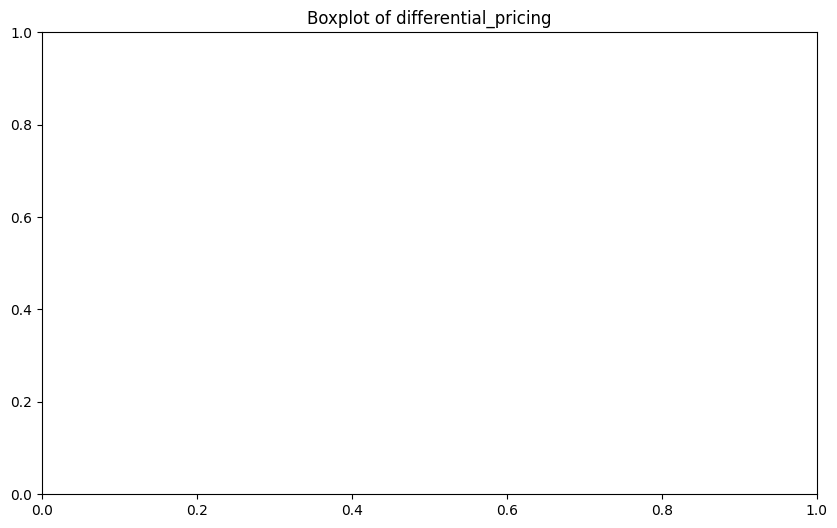

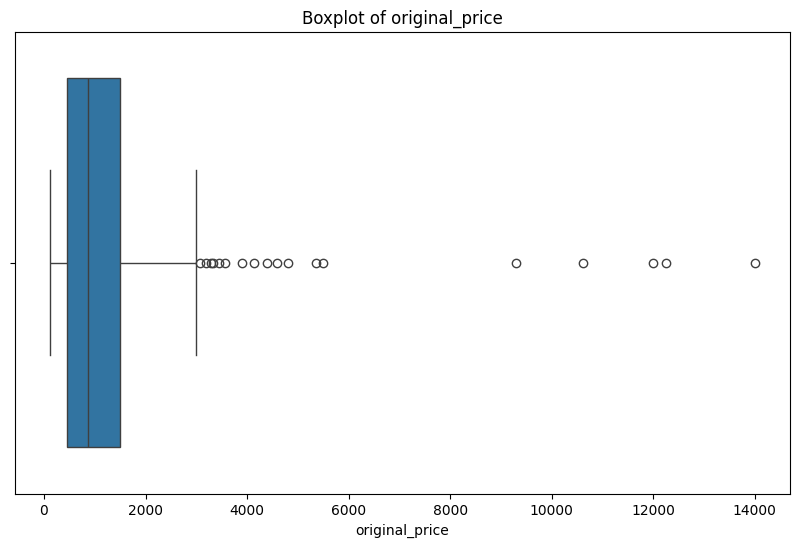

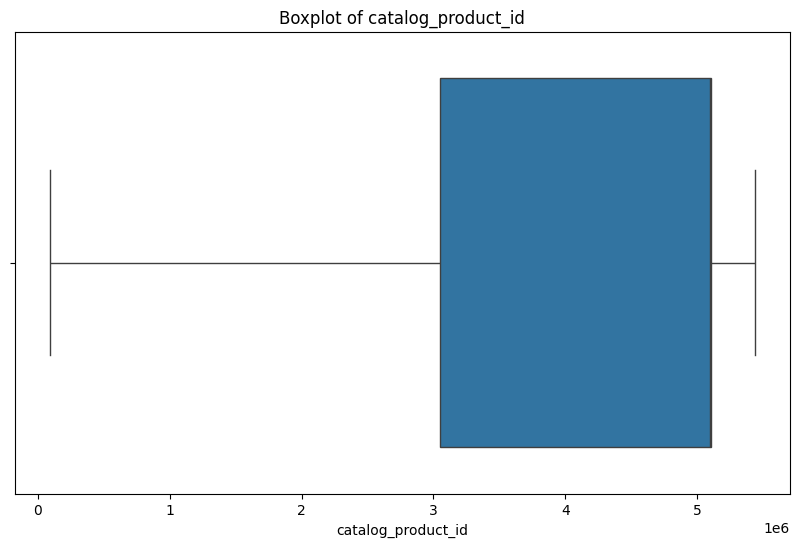

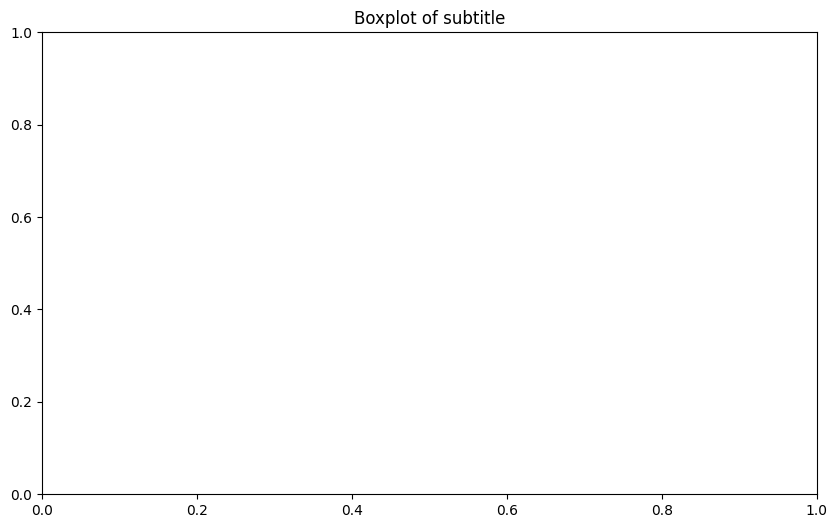

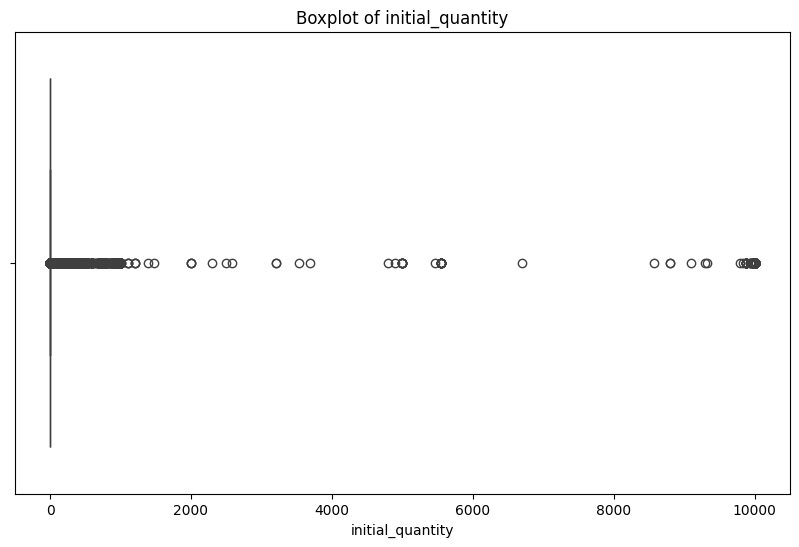

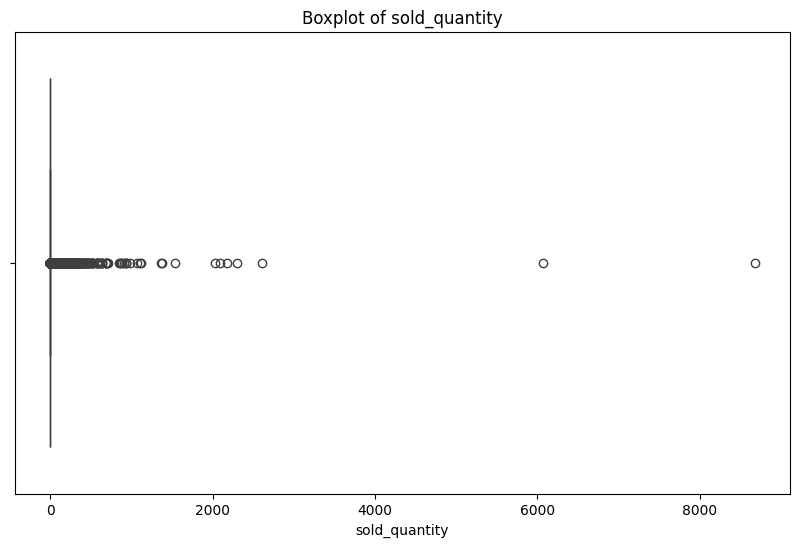

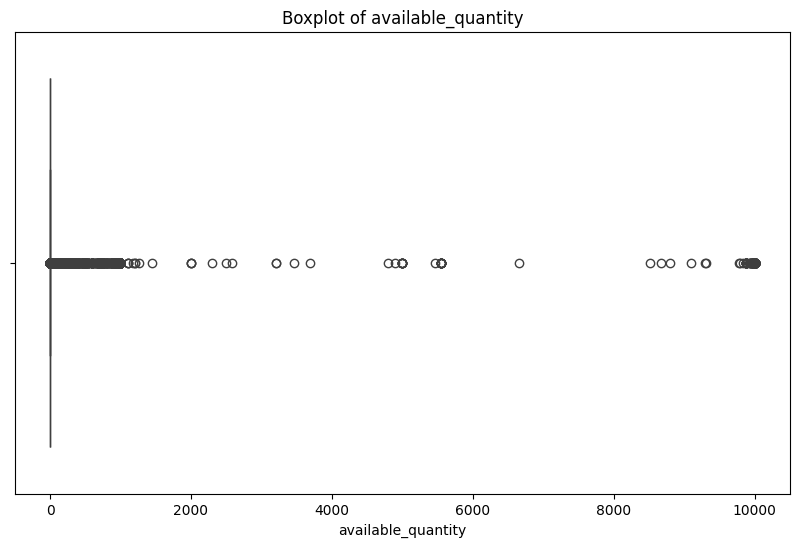

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrar solo las columnas numéricas
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Revisar y limpiar datos no numéricos o problemáticos
for col in numeric_df.columns:
    # Filtrar las filas que tienen datos no válidos (no numéricos o NaN)
    if numeric_df[col].dropna().apply(lambda x: isinstance(x, (int, float))).all():
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=numeric_df[col].dropna())
        plt.title(f"Boxplot of {col}")
        plt.show()
    else:
        print(f"Skipping column {col} due to invalid data.")


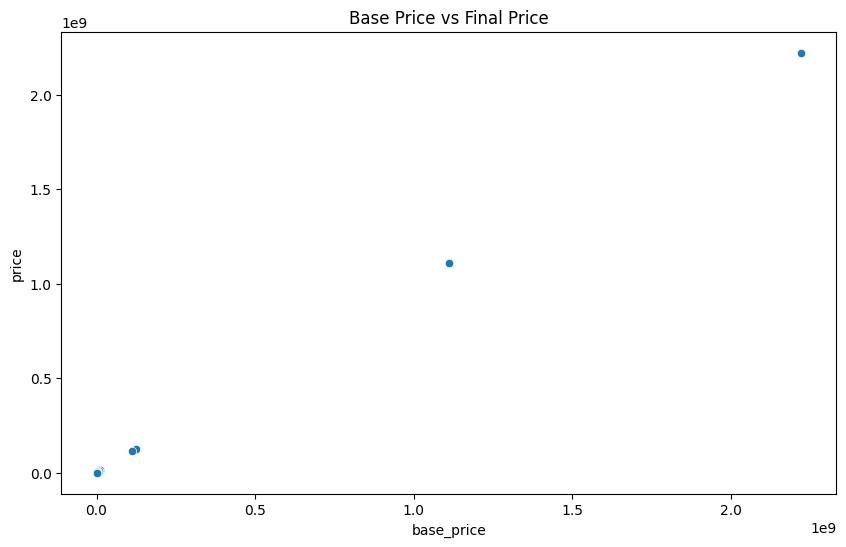

In [13]:
# Scatter plot entre base_price y price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='base_price', y='price', data=df)
plt.title("Base Price vs Final Price")
plt.show()

C:\Users\tinaq\AppData\Local\Temp\ipykernel_9920\2834668949.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['price'], shade=True)


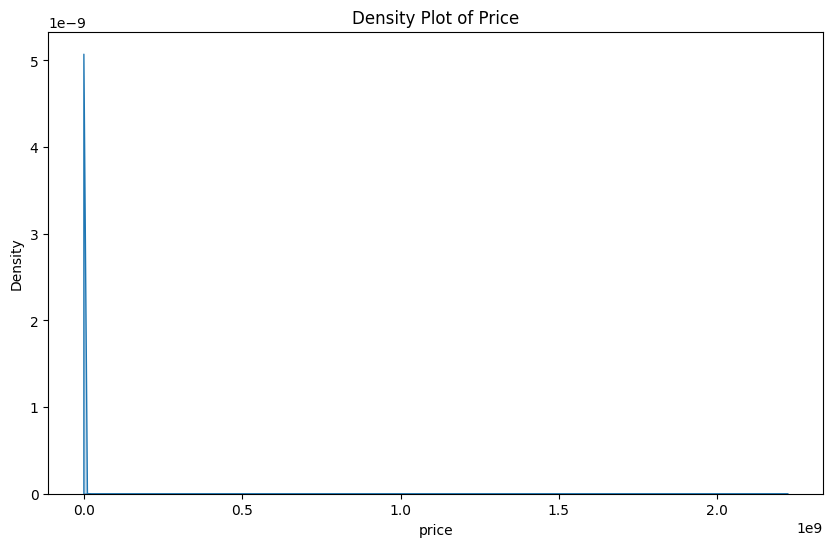

In [14]:
# KDE para la variable 'price'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['price'], shade=True)
plt.title("Density Plot of Price")
plt.show()


In [15]:
# Calcular la desviación estándar de precios por condición
price_variability_by_condition = df.groupby('condition')['price'].std()
print(price_variability_by_condition)


condition
new     9.584683e+06
used    7.348894e+06
Name: price, dtype: float64


In [16]:
df['price_range'] = df['price'] - df['base_price']


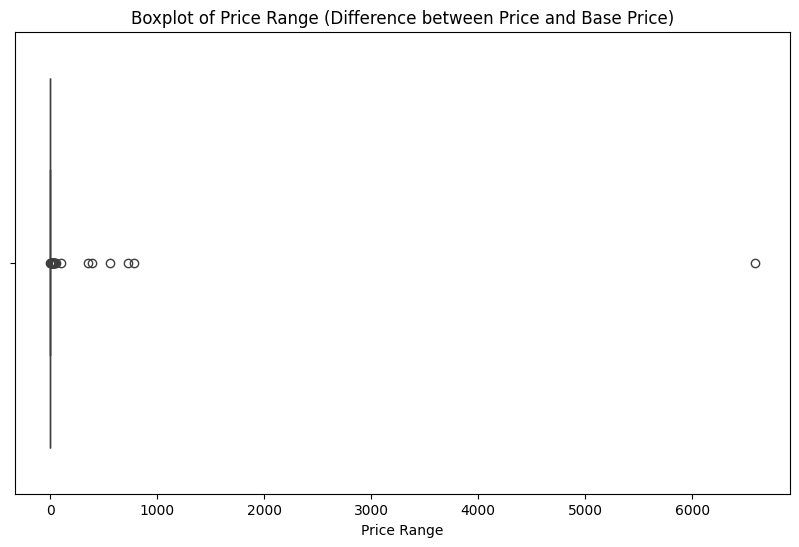

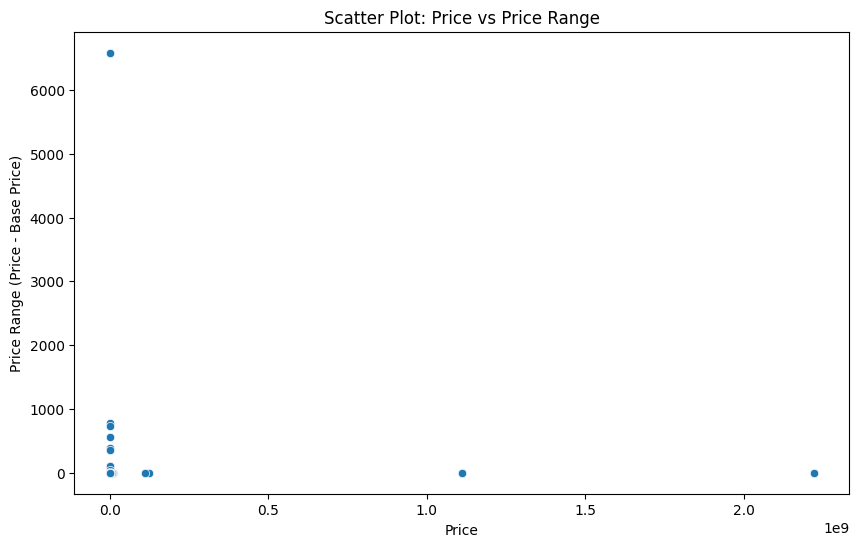

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear un boxplot para visualizar los valores atípicos del rango de precios
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price_range'])
plt.title("Boxplot of Price Range (Difference between Price and Base Price)")
plt.xlabel("Price Range")
plt.show()

# Crear un scatter plot para observar la relación entre 'price' y 'price_range'
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['price_range'])
plt.title("Scatter Plot: Price vs Price Range")
plt.xlabel("Price")
plt.ylabel("Price Range (Price - Base Price)")
plt.show()


In [ ]:
# Calcular porcentaje de descuento
df['discount_percentage'] = ((df['base_price'] - df['price']) / df['base_price']) * 100
df['discount_percentage'] = df['discount_percentage'].fillna(0)  # Para evitar divisiones por 0

# Histograma del porcentaje de descuento
plt.figure(figsize=(10, 6))
sns.histplot(df['discount_percentage'], bins=30)
plt.title("Distribution of Discount Percentage")
plt.show()
